# 2. Análisis de los eventos de la red eléctrica de Caracara
En este libro de notas se analizarán los eventos de fallas que se han presentado en el sistema eléctrico que le suministra energía a las áreas de producción del Bloque Caracara.
Los datos de los eventos de fallas son los suministrados en un archivo Excel denominado **EventosRedesCaracara_V3.xlsx**, el cual está alojado en la carpeta **xl**. 

El archivo original entregado por CEPSA es un libro Excel que se denomina "Cuadro control eventos Redes Distribución Bloque Caracara_V3.xlsx". Este libro contiene tres hojas de cálculo: "Calendario", "Grafica Transitorios" y "Base datos". 

Inicialmente estamos interesados en analizar la hoja "Base datos". Esta hoja contiene 2229 registros de eventos y 18 columnas. Ya los valores de los eventos fueron depurados y se almacenaron en una base de datos SQLite llamada 'bdEventosRed'. Quedaron depurados 2220 eventos.

## 2.1. Se lee la tabla 'EventosRed' de la base de datos 'dbEventosRed'.
Inicialmente se cargan los paquetes requeridos y luego se lee la tabla.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from time import strftime
from time import gmtime
import time
from datetime import timedelta
from dateutil.parser import parse
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [4]:
#Crea la base datos.
engine = create_engine('sqlite:///dbEventosRed.db', echo=False)
#Lee la tabla.
eventosRed = pd.read_sql_table('EventosRed', con=engine, index_col='idEvento')

## 2.2. Se crean nuevas columnas de interés a partir 'eventosRed'
Algunas de estas nuevas columnas pueden ser: 
* 1. 'duracionEvento'.
* 2. 'tipoCausa': 'Transitorio', 'Disparo', 'Maniobra'.
* 3. 'nivelTension': 'STN', 'STR', 'SDL'.
* 4. 'tramoLinea', ya existe.

In [6]:
#*******************************************************************************
# 2.1. Agrega columna 'duracionEvento' con valores en segundos. Ok.
#*******************************************************************************
# eventosRed['duracionEvento'] = ((eventosRed['fechaHoraFinal'] - \
#     eventosRed['fechaHoraInicial'])).dt.total_seconds()
# eventosRed['duracionEvento']

In [7]:
#*******************************************************************************
# 2.2. Columna 'tipoCausa' con categorías:'Disparo', 'Transit', 'Maniobr'. Ok.
#*******************************************************************************
# eventosRed['tipoCausa'] = ' ' #Crea la columna con valores vacios.
# eventosRed.loc[eventosRed['causas'].str.slice(0,7) == 'Disparo', 'tipoCausa'] = 'Disparo'
# eventosRed.loc[eventosRed['causas'].str.slice(0,7) == 'Transit', 'tipoCausa'] = 'Transitorio'
# eventosRed.loc[eventosRed['causas'].str.slice(0,7) == 'Maniobr', 'tipoCausa'] = 'Maniobra'
#eventosRed['tipoCausa']

In [3]:
#*******************************************************************************
# 2.3. Columna 'nivelTension' con categorías:'STN', 'STR', 'SDL'. Ok.
#*******************************************************************************
# eventosRed['nivelTension'] = ' ' #Crea la columna con valores vacios.
# eventosRed.loc[eventosRed['tramoLinea'].str.slice(0,6) == '230 kV', \
#    'nivelTension'] = 'STN'
# eventosRed.loc[eventosRed['tramoLinea'].str.slice(0,6) == '115 kV', \
#    'nivelTension'] = 'STR'
#pd.unique(eventosRed['nivelTension'])

In [3]:
#Salva eventosRed en eventosRedNc (con nuevas columnas), con formato parquet.
#eventosRed.to_parquet("parquet/eventosRedNc.parquet.gzip", compression='gzip')
#Lee el archivo eventosRed en formato parquet.
#eventosRed = pd.read_parquet("parquet/eventosRedNc.parquet.gzip")  

## 2.3. Número de eventos, de todo tipo, por año - mes
Se usará 'fechaHoraInicial' como columna para agregar por año - mes.

In [6]:
# numeroEventosMes = eventosRed 
# numeroEventosMes = numeroEventosMes.groupby(numeroEventosMes\
#     ['fechaHoraInicial'].dt.to_period('M')).count()
# numeroEventosMes = numeroEventosMes.rename(columns={'fechaHoraFinal': 'EventosMensuales'})
# numeroEventosMes = numeroEventosMes['EventosMensuales']
# numeroEventosMes.index.name = 'Mes'
# numeroEventosMes

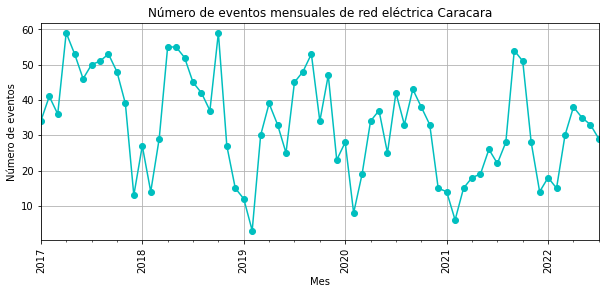

In [7]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Create a figure containing a single axes.
ax1.set_title ('Número de eventos mensuales de red eléctrica Caracara')
ax1.set_ylabel ('Número de eventos')
#ax1.set_xticklabels(numeroEventosMes.index.strftime('%y-%m'), rotation = 45)
#divisionX = ['2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2022-01']
# divisionX = ['2017-01', '2017-04', '2017-07', '2017-10', \
#     '2018-01', '2018-04', '2018-07', '2018-10', \
#         '2019-01', '2019-04', '2019-07', '2019-10', \
#             '2020-01', '2020-04', '2020-07', '2020-10', \
#                 '2021-01', '2021-04', '2021-07', '2021-10', \
#                     '2022-01', '2022-04', '2022-07']
numeroEventosMes.plot(kind='line', grid=True, rot=90, style='c-o')
#ax1.set_xticklabels(numeroEventosMes.index)
plt.show()
#ax2 = fig.add_subplot(2, 1, 2)
#numeroEventosMes.index
#numeroEventosMes.values 

## 2.4. Número de eventos, de todo tipo, por nombre de mes
Se usará 'fechaHoraInicial' como columna para agregar por nombre de mes.

In [8]:
numeroEventosNombreMes = eventosRed 
numeroEventosNombreMes = numeroEventosNombreMes.groupby(numeroEventosNombreMes\
     ['fechaHoraInicial'].dt.month_name(locale='Spanish')).count()
numeroEventosNombreMes = numeroEventosNombreMes.rename(columns={'fechaHoraFinal': 'EventosPorClaseMes'})
numeroEventosNombreMes = numeroEventosNombreMes['EventosPorClaseMes']
numeroEventosNombreMes.index.name = 'Clase mes'
numeroEventosNombreMes = numeroEventosNombreMes[['Enero', 'Febrero', 'Marzo', \
    'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', \
        'Noviembre', 'Diciembre']]
#numeroEventosNombreMes

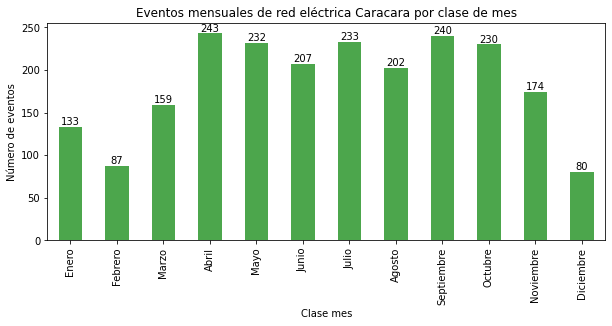

In [9]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Create a figure containing a single axes.
ax1.set_title ('Eventos mensuales de red eléctrica Caracara por clase de mes')
ax1.set_ylabel ('Número de eventos')
ax1.bar_label(ax1.bar(numeroEventosNombreMes.index, numeroEventosNombreMes.values, \
    color = 'g', alpha=0.0))
numeroEventosNombreMes.plot.bar(color='g', alpha=0.7)
plt.show()
#ax2 = fig.add_subplot(2, 1, 2) 

## 2.5. Número de eventos, de todo tipo, por hora del día
Se usará 'fechaHoraInicial' como columna para agregar por hora del día.

In [10]:
numeroEventosHoraDia = eventosRed 
numeroEventosHoraDia = numeroEventosHoraDia.groupby(numeroEventosHoraDia \
    ['fechaHoraInicial'].dt.hour).count()
numeroEventosHoraDia = numeroEventosHoraDia.rename(columns={'fechaHoraFinal': 'EventosPorHoraDia'})
numeroEventosHoraDia = numeroEventosHoraDia['EventosPorHoraDia']
numeroEventosHoraDia.index.name = 'Hora del día'
#numeroEventosHoraDia

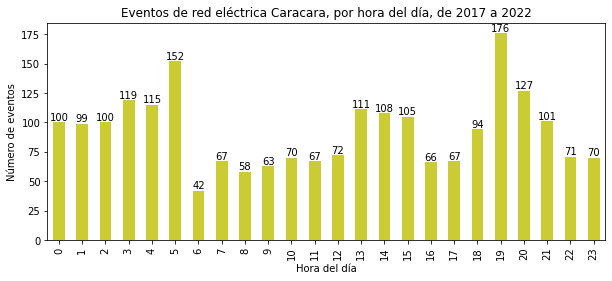

In [11]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Create a figure containing a single axes.
ax1.set_title ('Eventos de red eléctrica Caracara, por hora del día, de 2017 a 2022')
ax1.set_ylabel ('Número de eventos')
ax1.set_xlabel ('Hora del día')
#barras = ax1.bar(numeroEventosHoraDia.index, numeroEventosHoraDia.values)
ax1.bar_label(ax1.bar(numeroEventosHoraDia.index, numeroEventosHoraDia.values, \
    color = 'y', alpha=0.0))
numeroEventosHoraDia.plot.bar(color='y', alpha=0.8)
plt.show()
#ax2 = fig.add_subplot(2, 1, 2) 

## 2.6. Número de eventos, por tipo de 'nivelTension'.


In [132]:
#pd.unique(eventosRed['nivelTension'])
numeroEventosNivelTension = eventosRed 
numeroEventosNivelTension = \
    numeroEventosNivelTension.\
        groupby(numeroEventosNivelTension['nivelTension']).count()
numeroEventosNivelTension = numeroEventosNivelTension.\
    rename(columns={'fechaHoraFinal': 'EventosPorNivelTension'})
numeroEventosNivelTension = numeroEventosNivelTension['EventosPorNivelTension']
numeroEventosNivelTension.index.name = 'Nivel de tensión'
numeroEventosNivelTension = numeroEventosNivelTension.sort_values(ascending=False)
numeroEventosNivelTension

Nivel de tensión
STR    1815
SDL     401
STN       4
Name: EventosPorNivelTension, dtype: int64

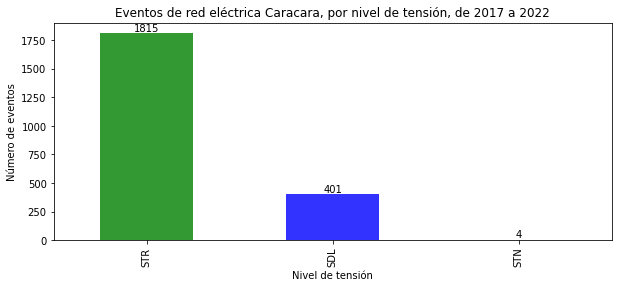

In [134]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Create a figure containing a single axes.
ax1.set_title ('Eventos de red eléctrica Caracara, por nivel de tensión, de 2017 a 2022')
ax1.set_ylabel ('Número de eventos')
ax1.set_xlabel ('Nivel de tensión')
ax1.bar_label(ax1.bar(numeroEventosNivelTension.index, numeroEventosNivelTension.values, \
    color = ['g', 'b', 'r'], alpha=0.0))
numeroEventosNivelTension.plot.bar(color=['g', 'b', 'r'], alpha=0.8)
plt.show()
#ax2 = fig.add_subplot(2, 1, 2) 

## 2.7. Eventos del 'nivelTension' STN.

In [38]:
eventosSTN = eventosRed[eventosRed['nivelTension']=='STN']
eventosSTN = eventosSTN.set_index('fechaHoraInicial')
eventosSTN.index.name = 'Fecha Hora Inicial'
eventosSTN = eventosSTN['duracionEvento']/60
#eventosSTN

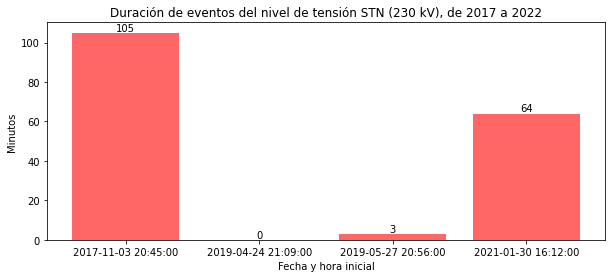

In [72]:
ind = np.arange(4)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
p1 = ax1.bar(ind, eventosSTN.values, color='r', alpha=0.6)
ax1.set_title ('Duración de eventos del nivel de tensión STN (230 kV), de 2017 a 2022')
ax1.set_ylabel ('Minutos')
ax1.set_xlabel ('Fecha y hora inicial')
ax1.set_xticks(ind, labels=eventosSTN.index)
#eventosSTN.plot.bar(color='r', alpha=0.5)
#ax1.bar_label([0, 1, 2, 3], eventosSTN.values)
ax1.bar_label(p1)
plt.show()

## 2.8. Eventos del 'nivelTension' SDL (34,5 kV)

In [41]:
# eventosSDL = eventosRed[eventosRed['nivelTension']=='SDL']
# eventosSDL = eventosSDL[['fechaHoraInicial', 'duracionEvento']]
#eventosSDL['anio'] = pd.to_datetime(eventosSDL['fechaHoraInicial']).dt.to_period('M')
# eventosSDL['anio'] = ''
# eventosSDL.loc[16, 'anio'] = '2017'
# eventosSDL.loc[527, 'anio'] = '2018'
# eventosSDL.loc[988, 'anio'] = '2019'
# eventosSDL.loc[1372, 'anio'] = '2020'
# eventosSDL.loc[2027, 'anio'] = '2022'
eventosSDL = eventosSDL.set_index('fechaHoraInicial')
eventosSDL.index.name = 'fechaHoraInicial'
eventosSDL['duracionEvento'] = eventosSDL['duracionEvento']/60
# #eventosSDL[eventosSDL['anio'] == '2022']
# #eventosSDL['anio']
eventosSDL

,duracionEvento,anio
fechaHoraInicial,,
2017-01-17 16:55:00,0.0,2017
2017-01-21 05:50:00,0.0,
2017-01-30 21:51:00,0.0,
2017-01-31 03:27:00,413.0,
2017-01-31 09:27:00,0.0,
...,...,...
2022-05-16 03:17:00,0.0,
2022-05-30 18:23:00,0.0,
2022-06-19 12:42:00,79.0,


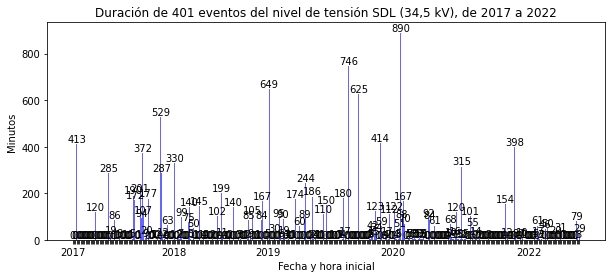

In [54]:
ind = np.arange(401)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
p1 = ax1.bar(ind, eventosSDL['duracionEvento'].values, color='b', alpha=0.6)
ax1.set_title ('Duración de 401 eventos del nivel de tensión SDL (34,5 kV), de 2017 a 2022')
ax1.set_ylabel ('Minutos')
ax1.set_xlabel ('Fecha y hora inicial')
ax1.set_xticks(ind, labels=eventosSDL['anio'])
#eventosSTN.plot.bar(color='r', alpha=0.5)
#ax1.bar_label([0, 1, 2, 3], eventosSTN.values)
ax1.bar_label(p1)
plt.show()

## 2.8. Eventos del 'nivelTension' STR (115 kV)

In [51]:
# eventosSTR = eventosRed[eventosRed['nivelTension']=='STR']
# eventosSTR = eventosSTR[['fechaHoraInicial', 'duracionEvento']]
# eventosSTR['anio'] = pd.to_datetime(eventosSTR['fechaHoraInicial']).dt.to_period('M')
# eventosSTR['anio'] = ''
# eventosSTR.loc[0, 'anio'] = '2017'
# eventosSTR.loc[523, 'anio'] = '2018'
# eventosSTR.loc[980, 'anio'] = '2019'
# eventosSTR.loc[1373, 'anio'] = '2020'
# eventosSTR.loc[1727, 'anio'] = '2021'
# eventosSTR.loc[2021, 'anio'] = '2022'
# eventosSTR = eventosSTR.set_index('fechaHoraInicial')
# eventosSTR.index.name = 'fechaHoraInicial'
# eventosSTR['duracionEvento'] = eventosSTR['duracionEvento']/60
#eventosSTR[eventosSTR['anio'] == '2022']
# #eventosSTR['anio']
# eventosSTR

,duracionEvento,anio
fechaHoraInicial,,
2017-01-01 04:32:00,5.0,2017
2017-01-02 00:39:00,4.0,
2017-01-02 04:34:00,3.0,
2017-01-03 04:34:00,3.0,
2017-01-03 16:34:00,0.0,
...,...,...
2022-07-17 16:27:00,0.0,
2022-07-18 18:33:00,0.0,
2022-07-20 05:28:00,0.0,


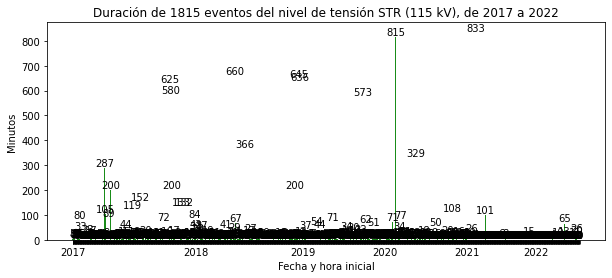

In [53]:
ind = np.arange(1815)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
p1 = ax1.bar(ind, eventosSTR['duracionEvento'].values, color='g', alpha=0.9)
ax1.set_title ('Duración de 1815 eventos del nivel de tensión STR (115 kV), de 2017 a 2022')
ax1.set_ylabel ('Minutos')
ax1.set_xlabel ('Fecha y hora inicial')
ax1.set_xticks(ind, labels=eventosSTR['anio'])
#eventosSTN.plot.bar(color='r', alpha=0.5)
#ax1.bar_label([0, 1, 2, 3], eventosSTN.values)
ax1.bar_label(p1)
plt.show()

In [91]:
# eventosSTRCausa = eventosRed[eventosRed['nivelTension']=='STR']
# eventosSTRCausa = eventosSTRCausa[['fechaHoraInicial', 'tipoCausa']]
# eventosSTRCausa = eventosSTRCausa.set_index('fechaHoraInicial')
# eventosSTRCausa.index.name = 'fechaHoraInicial'
#eventosSTRCausa['cuenta'] = 1

# eventosSTR['anio'] = pd.to_datetime(eventosSTR['fechaHoraInicial']).dt.to_period('M')
# eventosSTR['anio'] = ''
# eventosSTR.loc[0, 'anio'] = '2017'
# eventosSTR.loc[523, 'anio'] = '2018'
# eventosSTR.loc[980, 'anio'] = '2019'
# eventosSTR.loc[1373, 'anio'] = '2020'
# eventosSTR.loc[1727, 'anio'] = '2021'
# eventosSTR.loc[2021, 'anio'] = '2022'
# eventosSTR['duracionEvento'] = eventosSTR['duracionEvento']/60
#eventosSTR[eventosSTR['anio'] == '2022']
# #eventosSTR['anio']
#eventosSTRCausa
#eventosSTRCausaPivot = pd.pivot_table(eventosSTRCausa, index="fechaHoraInicial", columns="tipoCausa", 
#                       values="cuenta", aggfunc="sum")
#eventosSTRCausaPivot
#eventosSTRCausaTotal = eventosSTRCausaPivot.groupby(pd.to_datetime(pivot.index).to_period('M')).sum()
#eventosSTRCausaTotal

tipoCausa,Disparo,Maniobra,Transitorio
fechaHoraInicial,,,
2017-01,24.0,0.0,5.0
2017-02,8.0,0.0,30.0
2017-03,8.0,0.0,17.0
2017-04,17.0,0.0,30.0
2017-05,25.0,0.0,19.0
...,...,...,...
2022-03,0.0,0.0,22.0
2022-04,0.0,0.0,26.0
2022-05,4.0,0.0,26.0


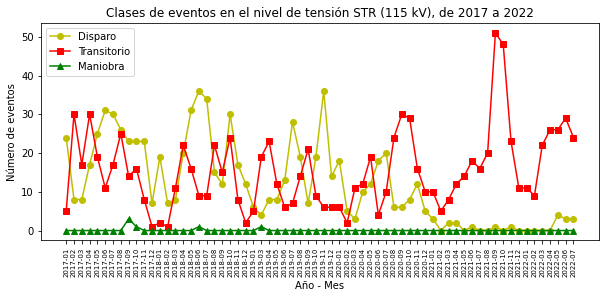

In [129]:
ind = np.arange(66)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
#p1 = ax1(ind, eventosSTRCausaTotal.values)
ax1.set_title ('Clases de eventos en el nivel de tensión STR (115 kV), de 2017 a 2022')
ax1.set_ylabel ('Número de eventos')
ax1.set_xlabel ('Año - Mes')
ax1.set_xticks(ind, labels=eventosSTRCausaTotal.index, rotation=90, fontsize=7)
#plt.xticks(rotation=90)
ax1.plot(ind, eventosSTRCausaTotal.Disparo, 'y-o', label='Disparo')
ax1.plot(ind, eventosSTRCausaTotal.Transitorio, 'r-s', label='Transitorio')
ax1.plot(ind, eventosSTRCausaTotal.Maniobra, 'g-^', label='Maniobra')
plt.legend(loc='best')
plt.show()